<h1>Cryptocurrency Price Prediction Using LSTM</h1>
<p>This project implements a Long Short-Term Memory (LSTM) neural network to predict the price of Bitcoin using historical data from Yahoo Finance. The model is trained on past price data and attempts to forecast future prices based on patterns identified during training.</p>

<h2>Code Breakdown</h2>
<h3>1. Data Collection:</h3>

In [1]:
import yfinance as yf

# Fetch Bitcoin price data for the financial year 2023-24
start_date = '2023-04-01'
end_date = '2024-03-31'
bitcoin_data = yf.download('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


<p>The data is fetched using the Yahoo Finance API, specifying Bitcoin (BTC-USD) and the required date range (April 2023 to March 2024).
<br><br> This part automates the retrieval of historical financial data, which is crucial for training the predictive model.</p>

<h3>2. Data Preprocessing:</h3>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Extract 'Close' price and ensure 'Date' is the index
data = bitcoin_data[['Close']]
data.index = pd.to_datetime(data.index)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

<p>Select only the 'Close' price for Bitcoin and normalize it using MinMaxScaler to scale the data between 0 and 1.
<br><br>The LSTM model performs better with scaled data, so normalization is essential. This ensures faster convergence and avoids large numerical discrepancies.</p>

<h3>3. Dataset Creation for LSTM:</h3>

In [5]:
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # Number of time steps to look back
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

<p>Prepare the data for training by creating sequences of length look_back (60 days) for the input features X, and corresponding targets y.
<br><br>LSTM models are sequence-based, and this function reshapes the data so the model can learn temporal dependencies.</p>

<h3>4. LSTM Model Building:</h3>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam

# Build LSTM model
model = Sequential()
model.add(Input(shape=(look_back, 1)))  # Define input shape with Input layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

<p>Define and compile the LSTM neural network architecture.
<br><br>• Two LSTM layers are used to capture complex temporal dependencies.<br>
• The final Dense layer is responsible for predicting the next price.<br>
• Adam optimizer ensures efficient optimization of the model.</p>

<h3>5. Training the Model:</h3>

In [9]:
# Train the model
model.fit(X, y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0943
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0228
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0108
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0049
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0040
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0032
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0027
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0029


<p>The LSTM model is trained on the data for 10 epochs using a batch size of 32.<br><br>
During training, the model learns to adjust its weights to minimize the loss function (mean_squared_error).</p>

<h3>6. Prediction of Future Prices:</h3>

In [24]:
def predict_future(model, data, look_back, future_days):
    predictions = []
    current_sequence = data[-look_back:]
    for _ in range(future_days):
        x_input = current_sequence.reshape((1, look_back, 1))
        future_price = model.predict(x_input, verbose=0)
        predictions.append(future_price[0, 0])
        current_sequence = np.append(current_sequence[1:], future_price, axis=0)
    return np.array(predictions)

future_days = 30
future_predictions = predict_future(model, scaled_data, look_back, future_days)

<p>Predict the next future_days (30 days in this case) of Bitcoin prices.<br><br>
After training, the model is used to make rolling predictions based on the most recent sequence of data.</p>

<h3>7. Inverse Transformation and Plotting:</h3>

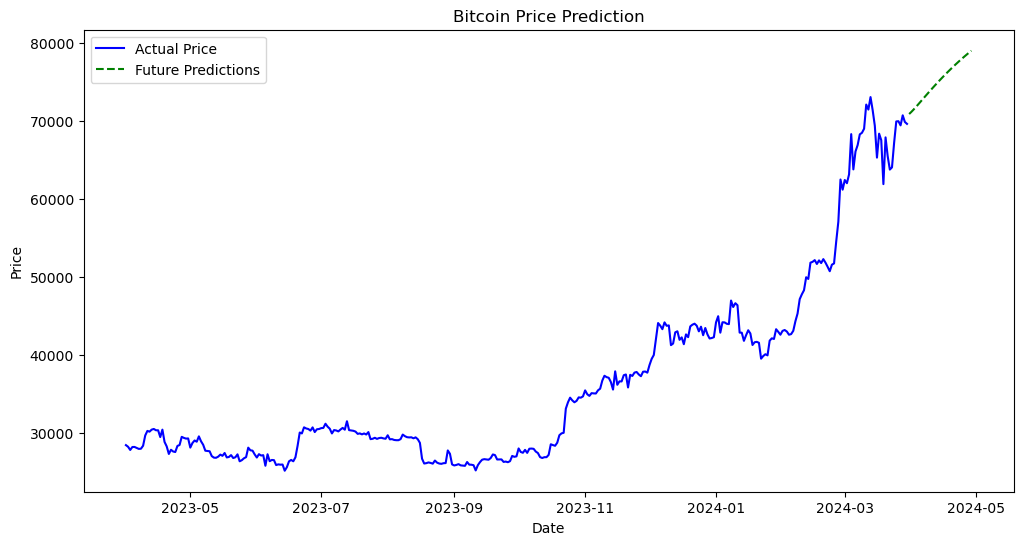

In [26]:
# Inverse transform predictions
scaled_data_inv = scaler.inverse_transform(scaled_data)
future_predictions_inv = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Actual Price')

# Plot predictions
predicted_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_days)
plt.plot(predicted_dates, future_predictions_inv, color='green', linestyle='--', label='Future Predictions')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<p>Visualize the actual prices and future predictions on a plot.<br><br>
The final predictions are inverse-transformed back to the original scale. A plot is generated, showing actual prices and predicted future prices.</p>